In [1]:
# Cell 1: Check your data files exist
import os

data_path = "data/"

files = os.listdir(data_path)
print("Files found:")
for f in files:
    print(f"  ✓ {f}")

Files found:
  ✓ IEA_CMCC_Snowfalldailyworldbysurfalldays.csv
  ✓ IEA_CMCC_Temperaturemindailyworldbysurfalldays.csv
  ✓ IEA_CMCC_Clouddailyworldbysurfalldays.csv
  ✓ IEA_CMCC_Wind100intdailyworldbysurfalldays.csv
  ✓ IEA_CMCC_Temperaturedailyworldbysurfalldays.csv
  ✓ IEA_CMCC_RHdailyworldbysurfalldays.csv
  ✓ IEA_CMCC_Temperaturemaxdailyworldbysurfalldays.csv
  ✓ IEA_CMCC_Precipitationdailyworldbysurfalldays.csv


In [2]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import os
from datetime import datetime

print("Packages loaded successfully")

Packages loaded successfully


In [9]:
# Cell 2: Configuration
RAW_DATA_PATH = "../data/raw/"
PROCESSED_DATA_PATH = "../data/processed/"
COUNTRY_CODE = "HUN"  # Hungary

# File mapping
FILES = {
    "wind100": "IEA_CMCC_Wind100intdailyworldbysurfalldays.csv",
    "temperature": "IEA_CMCC_Temperaturedailyworldbysurfalldays.csv",
    "humidity": "IEA_CMCC_RHdailyworldbysurfalldays.csv",
    "cloud": "IEA_CMCC_Clouddailyworldbysurfalldays.csv",
    "precipitation": "IEA_CMCC_Precipitationdailyworldbysurfalldays.csv"
}

In [10]:
# Cell 3a: Load a small sample first (these files are ~190MB each)
import pandas as pd

# Path to one file
file_path = "data/IEA_CMCC_Wind100intdailyworldbysurfalldays.csv"

# Load just first 1000 rows to check structure quickly
df_sample = pd.read_csv(file_path, nrows=1000)

print("Sample loaded successfully!")
print(f"Shape: {df_sample.shape}")

Sample loaded successfully!
Shape: (1000, 5)


In [11]:
# Cell 3b: Check column names
print("Column names:")
print(df_sample.columns.tolist())

Column names:
['Indicator', 'Wind speed (100-m)', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [12]:
# Cell 3c: Check first 10 rows
df_sample.head(10)

,Indicator,Wind speed (100-m),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Unit,m/s,NaN,NaN,NaN
1,Definition,100 metres wind direction is calculated using ...,NaN,NaN,NaN
2,Time granularity,Daily,NaN,NaN,NaN
3,Geographical granularity,National,NaN,NaN,NaN
4,Averaging method,Surface,NaN,NaN,NaN
5,Link to documentation,https://www.iea.org/articles/weather-for-energ...,NaN,NaN,NaN
6,Source,"IEA and CMCC (2025), (Weather for Energy Track...",NaN,NaN,NaN
7,Last updated,08-10-2025,NaN,NaN,NaN
8,Territory,SHORTNAME,ISO3,Date,Wind100int
9,Afghanistan,AFGHANIS,AFG,1979-01-01,3.1498182


In [13]:
# Cell 3c: Check first 10 rows
df_sample.head(10)

,Indicator,Wind speed (100-m),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Unit,m/s,NaN,NaN,NaN
1,Definition,100 metres wind direction is calculated using ...,NaN,NaN,NaN
2,Time granularity,Daily,NaN,NaN,NaN
3,Geographical granularity,National,NaN,NaN,NaN
4,Averaging method,Surface,NaN,NaN,NaN
5,Link to documentation,https://www.iea.org/articles/weather-for-energ...,NaN,NaN,NaN
6,Source,"IEA and CMCC (2025), (Weather for Energy Track...",NaN,NaN,NaN
7,Last updated,08-10-2025,NaN,NaN,NaN
8,Territory,SHORTNAME,ISO3,Date,Wind100int
9,Afghanistan,AFGHANIS,AFG,1979-01-01,3.1498182


In [14]:
# Cell 3d: Check data types
print("Data types:")
print(df_sample.dtypes)

Data types:
Indicator             object
Wind speed (100-m)    object
Unnamed: 2            object
Unnamed: 3            object
Unnamed: 4            object
dtype: object


In [15]:
# Cell 3e: Check unique values in potential country column
# Adjust column name based on what you see in Cell 3b

# Try common country column names
for col in df_sample.columns:
    if df_sample[col].dtype == 'object':  # String columns
        n_unique = df_sample[col].nunique()
        print(f"{col}: {n_unique} unique values")
        if n_unique < 20:  # Show values if few unique
            print(f"  Values: {df_sample[col].unique()[:10]}")
        print()

Indicator: 250 unique values

Wind speed (100-m): 250 unique values

Unnamed: 2: 241 unique values

Unnamed: 3: 6 unique values
  Values: [nan 'Date' '1979-01-01' '1979-01-02' '1979-01-03' '1979-01-04'
 '1979-01-05']

Unnamed: 4: 992 unique values



In [16]:
# Cell 3f: Check for Hungary in the data
# Adjust column name based on Cell 3b output

# Search for Hungary-related values
for col in df_sample.columns:
    if df_sample[col].dtype == 'object':
        matches = df_sample[df_sample[col].str.contains('HUN|Hungary|hun', case=False, na=False)]
        if len(matches) > 0:
            print(f"Found Hungary in column '{col}'")
            print(matches.head())
            break

Found Hungary in column 'Indicator'
    Indicator Wind speed (100-m) Unnamed: 2  Unnamed: 3 Unnamed: 4
98    Hungary            HUNGARY        HUN  1979-01-01   8.880933
339   Hungary            HUNGARY        HUN  1979-01-02   9.378816
580   Hungary            HUNGARY        HUN  1979-01-03  6.9830008
821   Hungary            HUNGARY        HUN  1979-01-04  5.9771347


In [17]:
# Cell 3g: Basic statistics of numeric columns
df_sample.describe()

,Indicator,Wind speed (100-m),Unnamed: 2,Unnamed: 3,Unnamed: 4
count,1000,1000,988,992,992
unique,250,250,241,6,992
top,Plurinational State of Bolivia,BOLIVIA,AFG,1979-01-01,Wind100int
freq,5,5,5,241,1


In [18]:
# Cell 3h: Check for missing values
print("Missing values per column:")
print(df_sample.isnull().sum())

Missing values per column:
Indicator              0
Wind speed (100-m)     0
Unnamed: 2            12
Unnamed: 3             8
Unnamed: 4             8
dtype: int64


In [19]:
# Cell 3i: Load data correctly - skip metadata rows
import pandas as pd

file_path = "data/IEA_CMCC_Wind100intdailyworldbysurfalldays.csv"

# Skip first 9 rows (metadata), row 9 becomes header
df = pd.read_csv(file_path, skiprows=9)

print("Actual column names:")
print(df.columns.tolist())
print(f"\nShape: {df.shape}")
df.head(10)

Actual column names:
['Territory', 'SHORTNAME', 'ISO3', 'Date', 'Wind100int']

Shape: (4115075, 5)


,Territory,SHORTNAME,ISO3,Date,Wind100int
0,Afghanistan,AFGHANIS,AFG,1979-01-01,3.149818
1,Albania,ALBANIA,ALB,1979-01-01,5.590656
2,Algeria,ALGERIA,DZA,1979-01-01,5.392799
3,American Samoa,AMSAMOA,ASM,1979-01-01,3.115038
4,Angola,ANGOLA,AGO,1979-01-01,2.932496
5,Antigua and Barbuda,ANTIGUA,ATG,1979-01-01,9.668302
6,Azerbaijan,AZERBAIJAN,AZE,1979-01-01,3.486646
7,Argentina,ARGENTINA,ARG,1979-01-01,5.714571
8,Australia,AUSTRALI,AUS,1979-01-01,6.544681
9,Austria,AUSTRIA,AUT,1979-01-01,7.175139


In [20]:
# Cell 3j: Verify column names and data types
print("Data types:")
print(df.dtypes)
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")

Data types:
Territory      object
SHORTNAME      object
ISO3           object
Date           object
Wind100int    float64
dtype: object

Date range: 1979-01-01 to 2025-09-30


In [21]:
# Cell 3k: Check Hungary data
df_hun = df[df['ISO3'] == 'HUN'].copy()

print(f"Hungary rows: {len(df_hun):,}")
print(f"Date range: {df_hun['Date'].min()} to {df_hun['Date'].max()}")
df_hun.head(10)

Hungary rows: 17,075
Date range: 1979-01-01 to 2025-09-30


,Territory,SHORTNAME,ISO3,Date,Wind100int
89,Hungary,HUNGARY,HUN,1979-01-01,8.880933
330,Hungary,HUNGARY,HUN,1979-01-02,9.378816
571,Hungary,HUNGARY,HUN,1979-01-03,6.983001
812,Hungary,HUNGARY,HUN,1979-01-04,5.977135
1053,Hungary,HUNGARY,HUN,1979-01-05,5.245791
1294,Hungary,HUNGARY,HUN,1979-01-06,3.107333
1535,Hungary,HUNGARY,HUN,1979-01-07,3.558552
1776,Hungary,HUNGARY,HUN,1979-01-08,4.921516
2017,Hungary,HUNGARY,HUN,1979-01-09,4.854447
2258,Hungary,HUNGARY,HUN,1979-01-10,4.077544


In [22]:
# Cell 3l: Check for missing values in Hungary data
print("Missing values in Hungary data:")
print(df_hun.isnull().sum())

Missing values in Hungary data:
Territory     0
SHORTNAME     0
ISO3          0
Date          0
Wind100int    0
dtype: int64


In [23]:
# Cell 3m: Basic statistics for Hungary wind speed
df_hun['Wind100int'].describe()

count    17075.000000
mean         4.836705
std          1.721769
min          1.143146
25%          3.550203
50%          4.605625
75%          5.905305
max         14.839683
Name: Wind100int, dtype: float64

In [31]:
# Cell 4a (UPDATED): Configuration
import pandas as pd
import numpy as np

DATA_PATH = "data/"
COUNTRY = "HUN"
SKIP_ROWS = 9

# File mapping with CORRECT column names
FILES = {
    "wind100": ("IEA_CMCC_Wind100intdailyworldbysurfalldays.csv", "Wind100int"),
    "temperature": ("IEA_CMCC_Temperaturedailyworldbysurfalldays.csv", "Temperature"),
    "humidity": ("IEA_CMCC_RHdailyworldbysurfalldays.csv", "RH"),
    "cloud": ("IEA_CMCC_Clouddailyworldbysurfalldays.csv", "Cloud"),
    "precipitation": ("IEA_CMCC_Precipitationdailyworldbysurfalldays.csv", "Precipitation")
}

In [32]:
# Cell 4b: First, check actual column names in each file
for var_name, (filename, _) in FILES.items():
    filepath = DATA_PATH + filename
    # Add encoding parameter to handle non-UTF-8 characters
    # Common encodings to try: 'latin1', 'ISO-8859-1', 'cp1252'
    df_temp = pd.read_csv(filepath, skiprows=9, nrows=5, encoding='latin1')
    print(f"{var_name}: {df_temp.columns.tolist()}")

wind100: ['Territory', 'SHORTNAME', 'ISO3', 'Date', 'Wind100int']
temperature: ['Territory', 'SHORTNAME', 'ISO3', 'Date', 'Temperature']
humidity: ['Territory', 'SHORTNAME', 'ISO3', 'Date', 'RH']
cloud: ['Territory', 'SHORTNAME', 'ISO3', 'Date', 'Cloud']
precipitation: ['Territory', 'SHORTNAME', 'ISO3', 'Date', 'Precipitation']


In [33]:
# Cell 4c (UPDATED): Load and filter function with encoding fix
def load_hungary_data(filepath, value_col, skip_rows=9):
    """
    Load CSV file, filter for Hungary, return date and value columns.
    """
    # Load data with correct encoding
    df = pd.read_csv(filepath, skiprows=skip_rows, encoding='latin1')
    
    # Filter for Hungary
    df_hun = df[df['ISO3'] == 'HUN'][['Date', value_col]].copy()
    
    # Convert date
    df_hun['Date'] = pd.to_datetime(df_hun['Date'])
    
    # Sort by date
    df_hun = df_hun.sort_values('Date').reset_index(drop=True)
    
    return df_hun

In [34]:
# Cell 4d: Load all variables
dataframes = {}

for var_name, (filename, value_col) in FILES.items():
    filepath = DATA_PATH + filename
    print(f"Loading {var_name}...")
    
    df = load_hungary_data(filepath, value_col)
    dataframes[var_name] = df
    print(f"  ✓ Loaded: {len(df):,} rows")

Loading wind100...
  ✓ Loaded: 17,075 rows
Loading temperature...
  ✓ Loaded: 17,075 rows
Loading humidity...
  ✓ Loaded: 17,075 rows
Loading cloud...
  ✓ Loaded: 17,075 rows
Loading precipitation...
  ✓ Loaded: 17,075 rows


In [35]:
# Cell 4e: Merge all variables into single dataframe
# Start with wind (target variable)
df_merged = dataframes['wind100'].copy()
df_merged.columns = ['Date', 'wind100']

# Merge other variables
for var_name, df in dataframes.items():
    if var_name != 'wind100':
        df_temp = df.copy()
        df_temp.columns = ['Date', var_name]
        
        # Merge on date
        df_merged = df_merged.merge(df_temp, on='Date', how='inner')
        print(f"After merging {var_name}: {len(df_merged):,} rows")

print(f"\nFinal dataset shape: {df_merged.shape}")
df_merged.head(10)

After merging temperature: 17,075 rows
After merging humidity: 17,075 rows
After merging cloud: 17,075 rows
After merging precipitation: 17,075 rows

Final dataset shape: (17075, 6)


,Date,wind100,temperature,humidity,cloud,precipitation
0,1979-01-01,8.880933,0.633400,76.418350,89.612400,0.107056
1,1979-01-02,9.378816,-7.753142,54.714380,96.358570,0.033683
2,1979-01-03,6.983001,-7.305340,61.000805,70.985110,0.005602
3,1979-01-04,5.977135,-6.303513,63.511276,58.874916,0.026097
4,1979-01-05,5.245791,-8.612535,69.593414,15.061408,0.000386
5,1979-01-06,3.107333,-8.886465,77.977910,57.731796,0.000058
6,1979-01-07,3.558552,-8.751790,81.101720,12.213375,0.000018
7,1979-01-08,4.921516,-7.839657,78.414925,16.854193,0.000021
8,1979-01-09,4.854447,-3.568093,76.337395,95.939290,0.059893
9,1979-01-10,4.077544,-0.439607,90.938644,95.250510,0.417832


In [36]:
# Cell 4f: Verify merged data
print("=" * 50)
print("MERGED DATASET SUMMARY")
print("=" * 50)
print(f"\nShape: {df_merged.shape}")
print(f"Date range: {df_merged['Date'].min().date()} to {df_merged['Date'].max().date()}")
print(f"Total days: {len(df_merged):,}")
print(f"\nColumns: {df_merged.columns.tolist()}")
print(f"\nMissing values:\n{df_merged.isnull().sum()}")

MERGED DATASET SUMMARY

Shape: (17075, 6)
Date range: 1979-01-01 to 2025-09-30
Total days: 17,075

Columns: ['Date', 'wind100', 'temperature', 'humidity', 'cloud', 'precipitation']

Missing values:
Date             0
wind100          0
temperature      0
humidity         0
cloud            0
precipitation    0
dtype: int64


In [37]:
# Cell 4g: Basic statistics
df_merged.describe()

,Date,wind100,temperature,humidity,cloud,precipitation
count,17075,17075.000000,17075.000000,17075.000000,17075.000000,17075.000000
mean,2002-05-17 00:00:00,4.836705,11.274494,71.564448,58.446693,0.078188
min,1979-01-01 00:00:00,1.143146,-16.593770,29.819216,0.000000,0.000000
25%,1990-09-08 12:00:00,3.550203,4.156642,61.929367,37.838355,0.002504
50%,2002-05-17 00:00:00,4.605625,11.829420,71.782020,60.311222,0.020780
75%,2014-01-22 12:00:00,5.905305,18.580247,81.731265,81.620113,0.095871
max,2025-09-30 00:00:00,14.839683,30.770351,98.532980,99.999150,1.541386
std,NaN,1.721769,8.741903,12.803168,26.702657,0.130060


In [38]:
# Cell 4h: Save processed data
output_path = "data/hungary_daily_processed.csv"
df_merged.to_csv(output_path, index=False)
print(f"✓ Saved to {output_path}")
print(f"  Rows: {len(df_merged):,}")
print(f"  Columns: {df_merged.columns.tolist()}")

✓ Saved to data/hungary_daily_processed.csv
  Rows: 17,075
  Columns: ['Date', 'wind100', 'temperature', 'humidity', 'cloud', 'precipitation']


In [39]:
# Cell 5a: Load processed data and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Load data
df = pd.read_csv("data/hungary_daily_processed.csv", parse_dates=['Date'])
df = df.set_index('Date')

print(f"Data loaded: {len(df):,} rows")
print(f"Date range: {df.index.min().date()} to {df.index.max().date()}")
df.head()

Data loaded: 17,075 rows
Date range: 1979-01-01 to 2025-09-30


,wind100,temperature,humidity,cloud,precipitation
Date,,,,,
1979-01-01,8.880933,0.633400,76.418350,89.612400,0.107056
1979-01-02,9.378816,-7.753142,54.714380,96.358570,0.033683
1979-01-03,6.983001,-7.305340,61.000805,70.985110,0.005602
1979-01-04,5.977135,-6.303513,63.511276,58.874916,0.026097
1979-01-05,5.245791,-8.612535,69.593414,15.061408,0.000386


In [41]:
# Create results folder
import os
os.makedirs('results', exist_ok=True)
print("✓ Results folder created")

✓ Results folder created


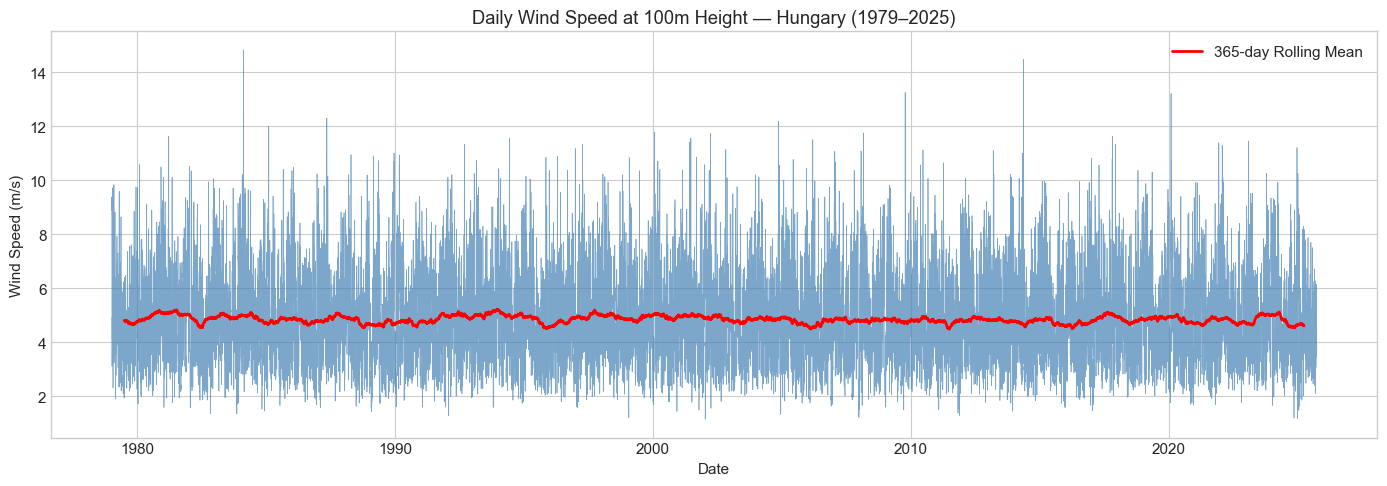

In [42]:
# Cell 5b: Wind speed time series
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(df.index, df['wind100'], linewidth=0.5, alpha=0.7, color='steelblue')
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Daily Wind Speed at 100m Height — Hungary (1979–2025)')

# Add rolling mean
rolling_365 = df['wind100'].rolling(window=365, center=True).mean()
ax.plot(df.index, rolling_365, color='red', linewidth=2, label='365-day Rolling Mean')
ax.legend()

plt.tight_layout()
plt.savefig('results/wind_timeseries.png', dpi=150)
plt.show()

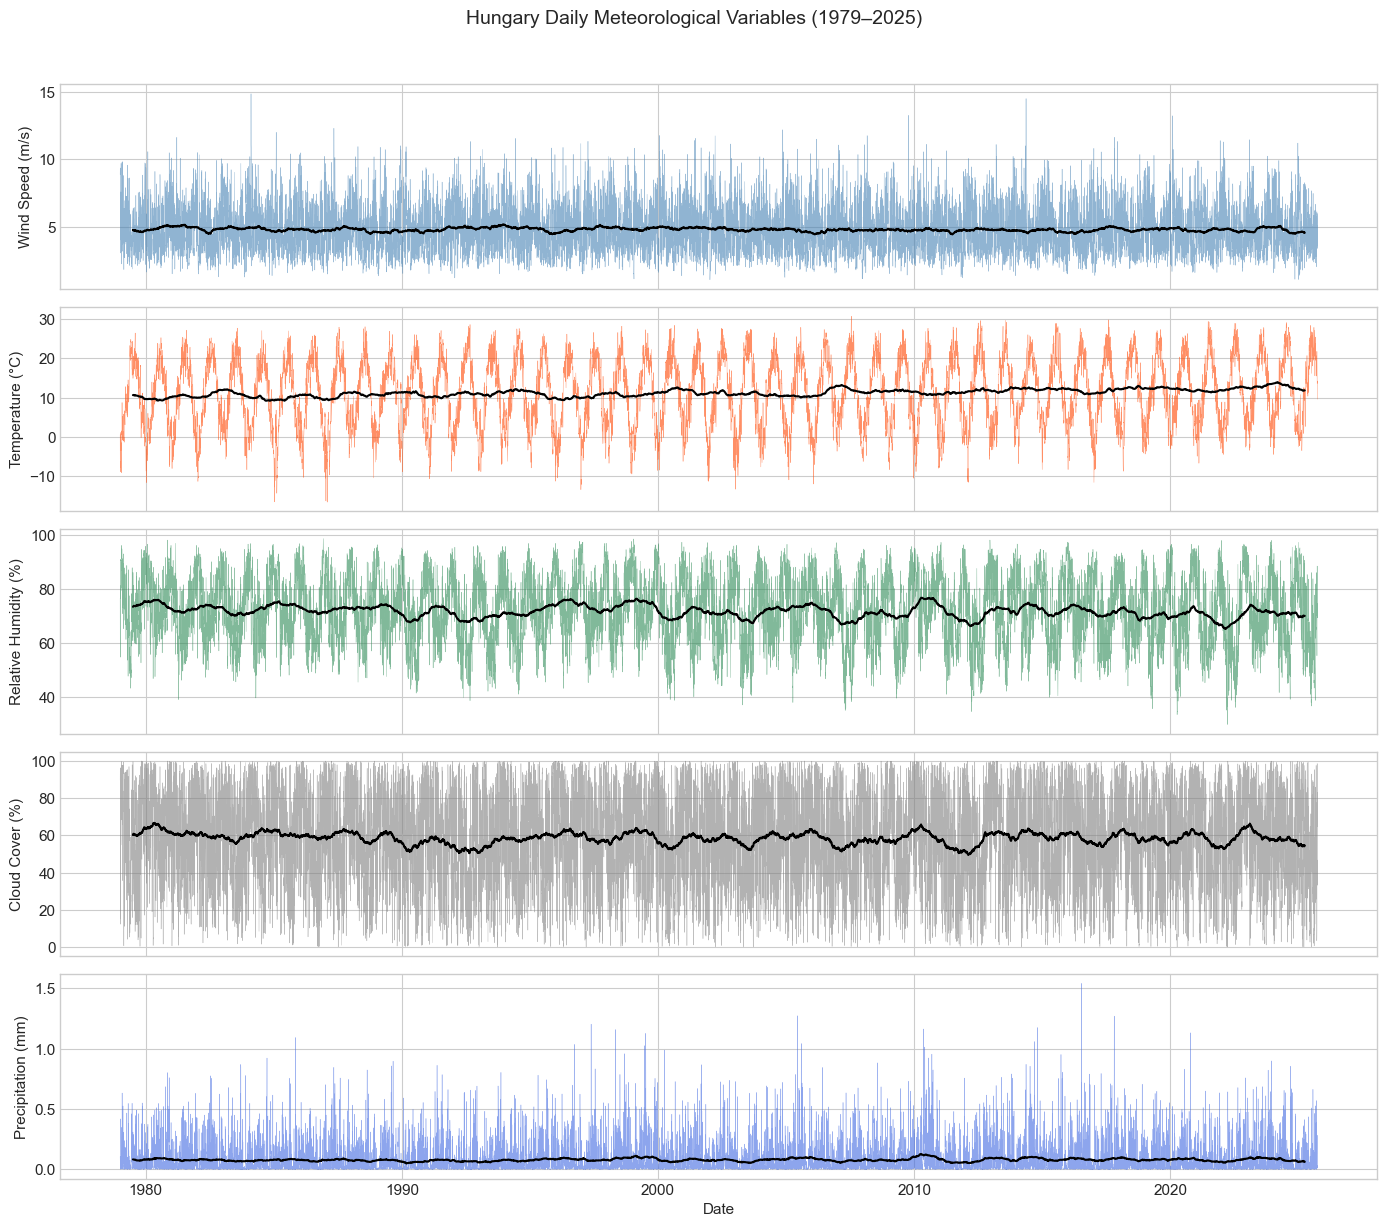

In [43]:
# Cell 5c: All variables overview
fig, axes = plt.subplots(5, 1, figsize=(14, 12), sharex=True)

variables = ['wind100', 'temperature', 'humidity', 'cloud', 'precipitation']
titles = ['Wind Speed (m/s)', 'Temperature (°C)', 'Relative Humidity (%)', 
          'Cloud Cover (%)', 'Precipitation (mm)']
colors = ['steelblue', 'orangered', 'seagreen', 'gray', 'royalblue']

for ax, var, title, color in zip(axes, variables, titles, colors):
    ax.plot(df.index, df[var], linewidth=0.3, alpha=0.6, color=color)
    ax.set_ylabel(title)
    
    # Add rolling mean
    rolling = df[var].rolling(window=365, center=True).mean()
    ax.plot(df.index, rolling, color='black', linewidth=1.5)

axes[-1].set_xlabel('Date')
fig.suptitle('Hungary Daily Meteorological Variables (1979–2025)', fontsize=14, y=1.02)

plt.tight_layout()
plt.savefig('results/all_variables_timeseries.png', dpi=150)
plt.show()

/var/folders/jf/y_d8h9rx2tv_7wcfn3vrj1x00000gn/T/ipykernel_45990/173287869.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='wind100', ax=ax, palette='coolwarm')
/var/folders/jf/y_d8h9rx2tv_7wcfn3vrj1x00000gn/T/ipykernel_45990/173287869.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_names)


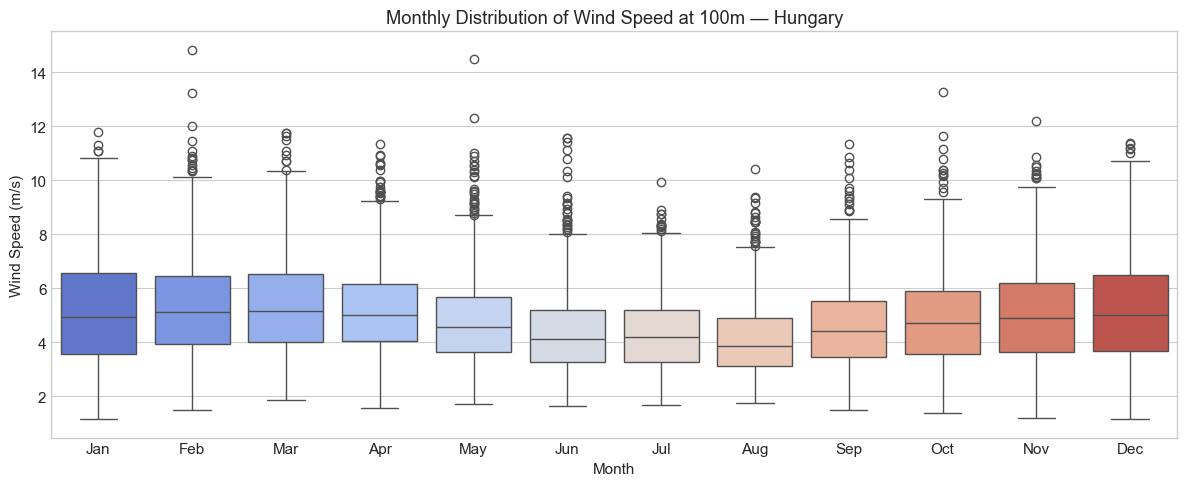

Monthly Mean Wind Speed (m/s):
month
1     5.15
2     5.29
3     5.36
4     5.18
5     4.74
6     4.35
7     4.33
8     4.11
9     4.57
10    4.85
11    5.01
12    5.17
Name: wind100, dtype: float64


In [44]:
# Cell 5d: Monthly patterns for wind speed
df['month'] = df.index.month
df['year'] = df.index.year

# Monthly boxplot
fig, ax = plt.subplots(figsize=(12, 5))

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.boxplot(data=df, x='month', y='wind100', ax=ax, palette='coolwarm')
ax.set_xticklabels(month_names)
ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Monthly Distribution of Wind Speed at 100m — Hungary')

plt.tight_layout()
plt.savefig('results/wind_monthly_boxplot.png', dpi=150)
plt.show()

# Print monthly means
print("Monthly Mean Wind Speed (m/s):")
print(df.groupby('month')['wind100'].mean().round(2))

/var/folders/jf/y_d8h9rx2tv_7wcfn3vrj1x00000gn/T/ipykernel_45990/500406794.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df_august, df_december], labels=['August', 'December'])


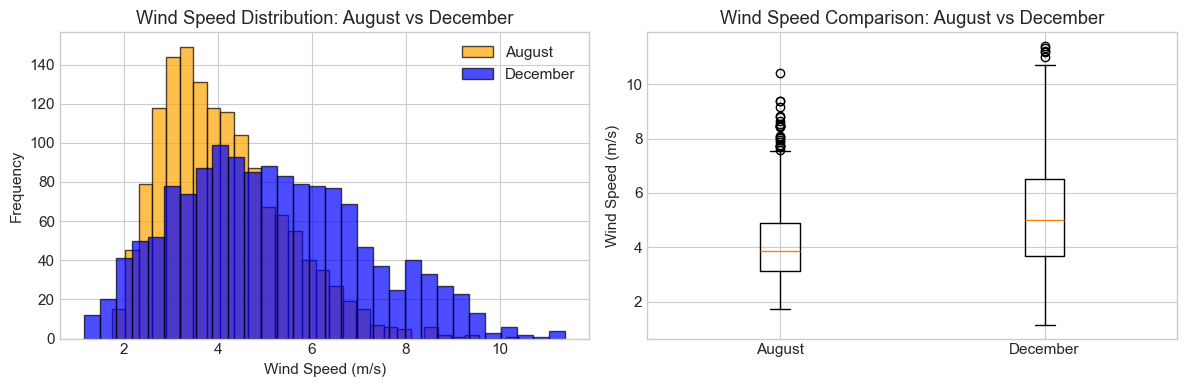

AUGUST vs DECEMBER COMPARISON

August:   Mean = 4.11 m/s, Std = 1.31
December: Mean = 5.17 m/s, Std = 1.99

T-test: t = -16.92, p-value = 2.62e-61
→ Statistically significant difference (p < 0.05)


In [45]:
# Cell 5e: August vs December comparison (for Sub-RQ1)
df_august = df[df['month'] == 8]['wind100']
df_december = df[df['month'] == 12]['wind100']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograms
axes[0].hist(df_august, bins=30, alpha=0.7, label='August', color='orange', edgecolor='black')
axes[0].hist(df_december, bins=30, alpha=0.7, label='December', color='blue', edgecolor='black')
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Wind Speed Distribution: August vs December')
axes[0].legend()

# Box plot comparison
data_compare = pd.DataFrame({
    'August': df_august.reset_index(drop=True),
    'December': df_december.reset_index(drop=True)
})
axes[1].boxplot([df_august, df_december], labels=['August', 'December'])
axes[1].set_ylabel('Wind Speed (m/s)')
axes[1].set_title('Wind Speed Comparison: August vs December')

plt.tight_layout()
plt.savefig('results/august_vs_december.png', dpi=150)
plt.show()

# Statistical comparison
print("=" * 50)
print("AUGUST vs DECEMBER COMPARISON")
print("=" * 50)
print(f"\nAugust:   Mean = {df_august.mean():.2f} m/s, Std = {df_august.std():.2f}")
print(f"December: Mean = {df_december.mean():.2f} m/s, Std = {df_december.std():.2f}")

# T-test
t_stat, p_value = stats.ttest_ind(df_august, df_december)
print(f"\nT-test: t = {t_stat:.2f}, p-value = {p_value:.2e}")
if p_value < 0.05:
    print("→ Statistically significant difference (p < 0.05)")

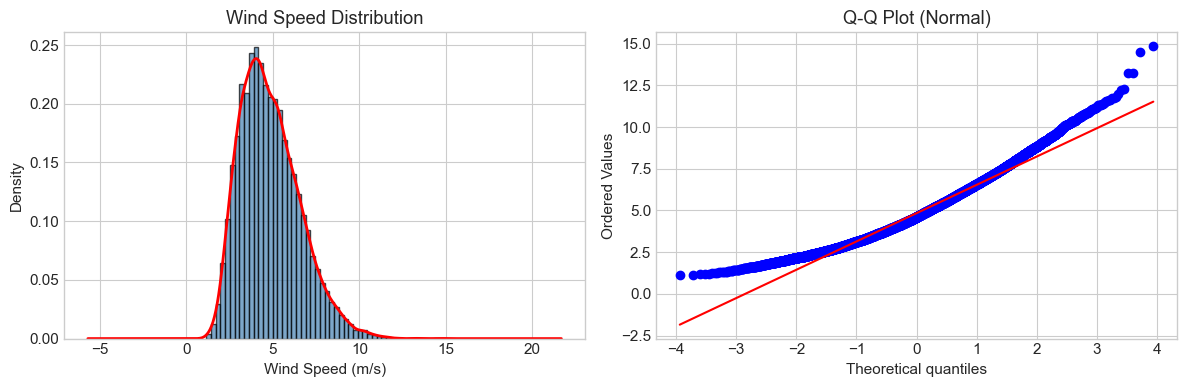

Shapiro-Wilk test: W = 0.9705, p-value = 6.94e-31
Skewness: 0.694
Kurtosis: 0.455


In [46]:
# Cell 5f: Wind speed distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram with KDE
axes[0].hist(df['wind100'], bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
df['wind100'].plot.kde(ax=axes[0], color='red', linewidth=2)
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('Density')
axes[0].set_title('Wind Speed Distribution')

# Q-Q plot
stats.probplot(df['wind100'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normal)')

plt.tight_layout()
plt.savefig('results/wind_distribution.png', dpi=150)
plt.show()

# Normality test
stat, p_value = stats.shapiro(df['wind100'].sample(5000, random_state=42))
print(f"Shapiro-Wilk test: W = {stat:.4f}, p-value = {p_value:.2e}")

# Skewness and Kurtosis
print(f"Skewness: {df['wind100'].skew():.3f}")
print(f"Kurtosis: {df['wind100'].kurtosis():.3f}")

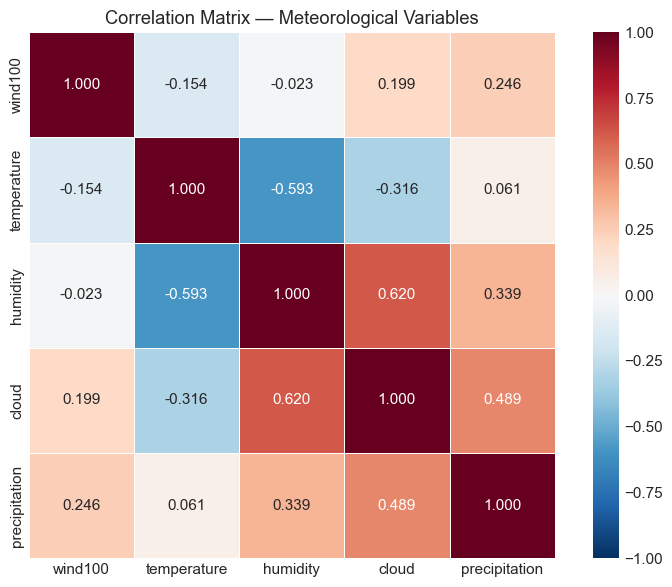

Correlations with Wind Speed:
wind100          1.000
precipitation    0.246
cloud            0.199
humidity        -0.023
temperature     -0.154
Name: wind100, dtype: float64


In [47]:
# Cell 5g: Correlation heatmap
fig, ax = plt.subplots(figsize=(8, 6))

corr_matrix = df[['wind100', 'temperature', 'humidity', 'cloud', 'precipitation']].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax,
            vmin=-1, vmax=1)
ax.set_title('Correlation Matrix — Meteorological Variables')

plt.tight_layout()
plt.savefig('results/correlation_heatmap.png', dpi=150)
plt.show()

print("Correlations with Wind Speed:")
print(corr_matrix['wind100'].sort_values(ascending=False).round(3))

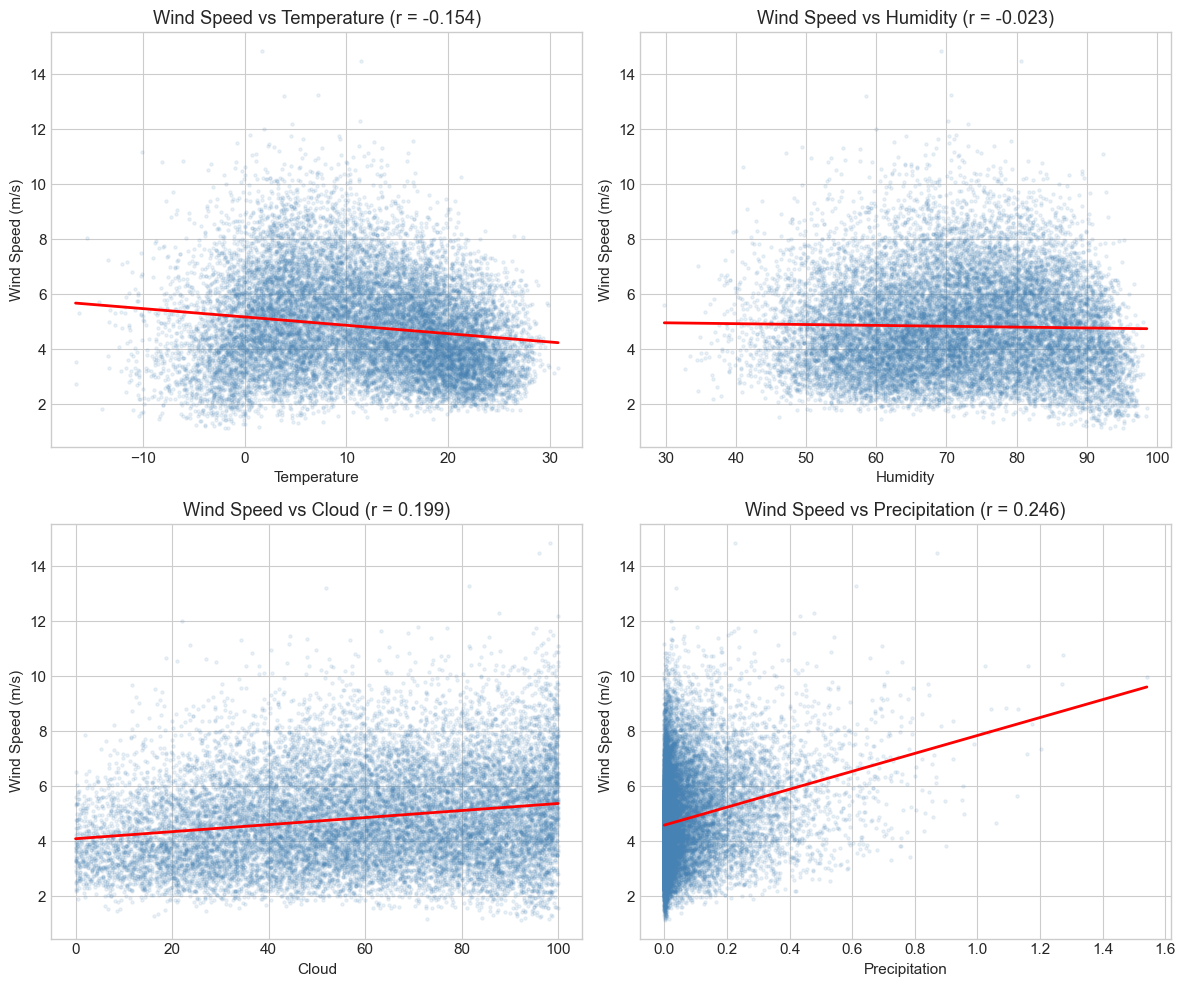

In [48]:
# Cell 5h: Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

predictors = ['temperature', 'humidity', 'cloud', 'precipitation']
axes_flat = axes.flatten()

for ax, var in zip(axes_flat, predictors):
    ax.scatter(df[var], df['wind100'], alpha=0.1, s=5, color='steelblue')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Wind Speed (m/s)')
    
    # Add correlation
    corr = df[var].corr(df['wind100'])
    ax.set_title(f'Wind Speed vs {var.capitalize()} (r = {corr:.3f})')
    
    # Add trend line
    z = np.polyfit(df[var], df['wind100'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[var].min(), df[var].max(), 100)
    ax.plot(x_line, p(x_line), "r-", linewidth=2)

plt.tight_layout()
plt.savefig('results/scatter_plots.png', dpi=150)
plt.show()

In [49]:
# Cell 5i: Stationarity tests (ADF and KPSS)
from statsmodels.tsa.stattools import adfuller, kpss

def stationarity_tests(series, name):
    """
    Perform ADF and KPSS tests for stationarity.
    """
    print(f"\n{'='*50}")
    print(f"STATIONARITY TESTS: {name}")
    print('='*50)
    
    # ADF Test
    adf_result = adfuller(series.dropna(), autolag='AIC')
    print(f"\nAugmented Dickey-Fuller Test:")
    print(f"  Test Statistic: {adf_result[0]:.4f}")
    print(f"  p-value: {adf_result[1]:.4e}")
    print(f"  Critical Values:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value:.4f}")
    
    if adf_result[1] < 0.05:
        print("  → Result: STATIONARY (reject null hypothesis)")
    else:
        print("  → Result: NON-STATIONARY (fail to reject null hypothesis)")
    
    # KPSS Test
    kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
    print(f"\nKPSS Test:")
    print(f"  Test Statistic: {kpss_result[0]:.4f}")
    print(f"  p-value: {kpss_result[1]:.4f}")
    print(f"  Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"    {key}: {value:.4f}")
    
    if kpss_result[1] > 0.05:
        print("  → Result: STATIONARY (fail to reject null hypothesis)")
    else:
        print("  → Result: NON-STATIONARY (reject null hypothesis)")

# Test wind speed
stationarity_tests(df['wind100'], 'Wind Speed (100m)')


STATIONARITY TESTS: Wind Speed (100m)

Augmented Dickey-Fuller Test:
  Test Statistic: -20.2830
  p-value: 0.0000e+00
  Critical Values:
    1%: -3.4307
    5%: -2.8617
    10%: -2.5669
  → Result: STATIONARY (reject null hypothesis)

KPSS Test:
  Test Statistic: 0.1396
  p-value: 0.1000
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390
  → Result: STATIONARY (fail to reject null hypothesis)


/var/folders/jf/y_d8h9rx2tv_7wcfn3vrj1x00000gn/T/ipykernel_45990/351329819.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')


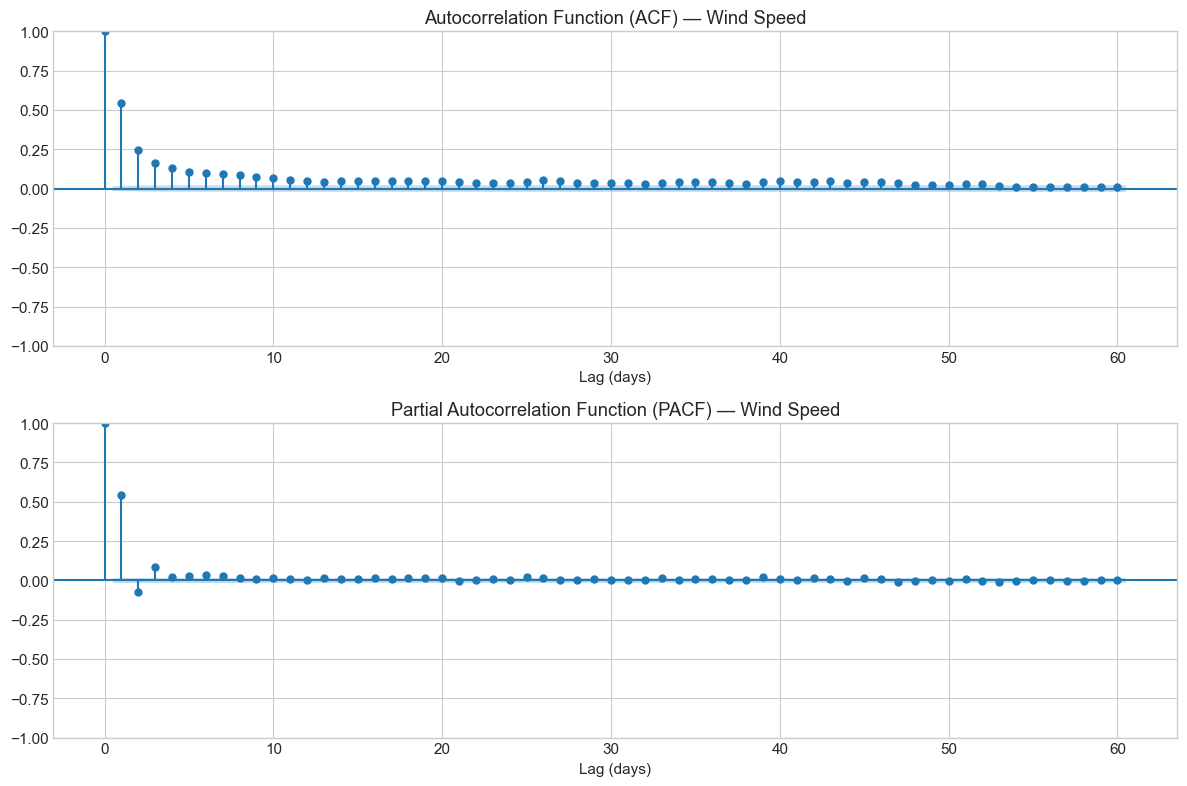

ACF/PACF Interpretation:
- Significant ACF at multiple lags → autoregressive behavior
- PACF cuts off after lag p → suggests AR(p) model


In [50]:
# Cell 5j: ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(df['wind100'], lags=60, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) — Wind Speed')
axes[0].set_xlabel('Lag (days)')

# PACF
plot_pacf(df['wind100'], lags=60, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) — Wind Speed')
axes[1].set_xlabel('Lag (days)')

plt.tight_layout()
plt.savefig('results/acf_pacf.png', dpi=150)
plt.show()

# Interpret
print("ACF/PACF Interpretation:")
print("- Significant ACF at multiple lags → autoregressive behavior")
print("- PACF cuts off after lag p → suggests AR(p) model")

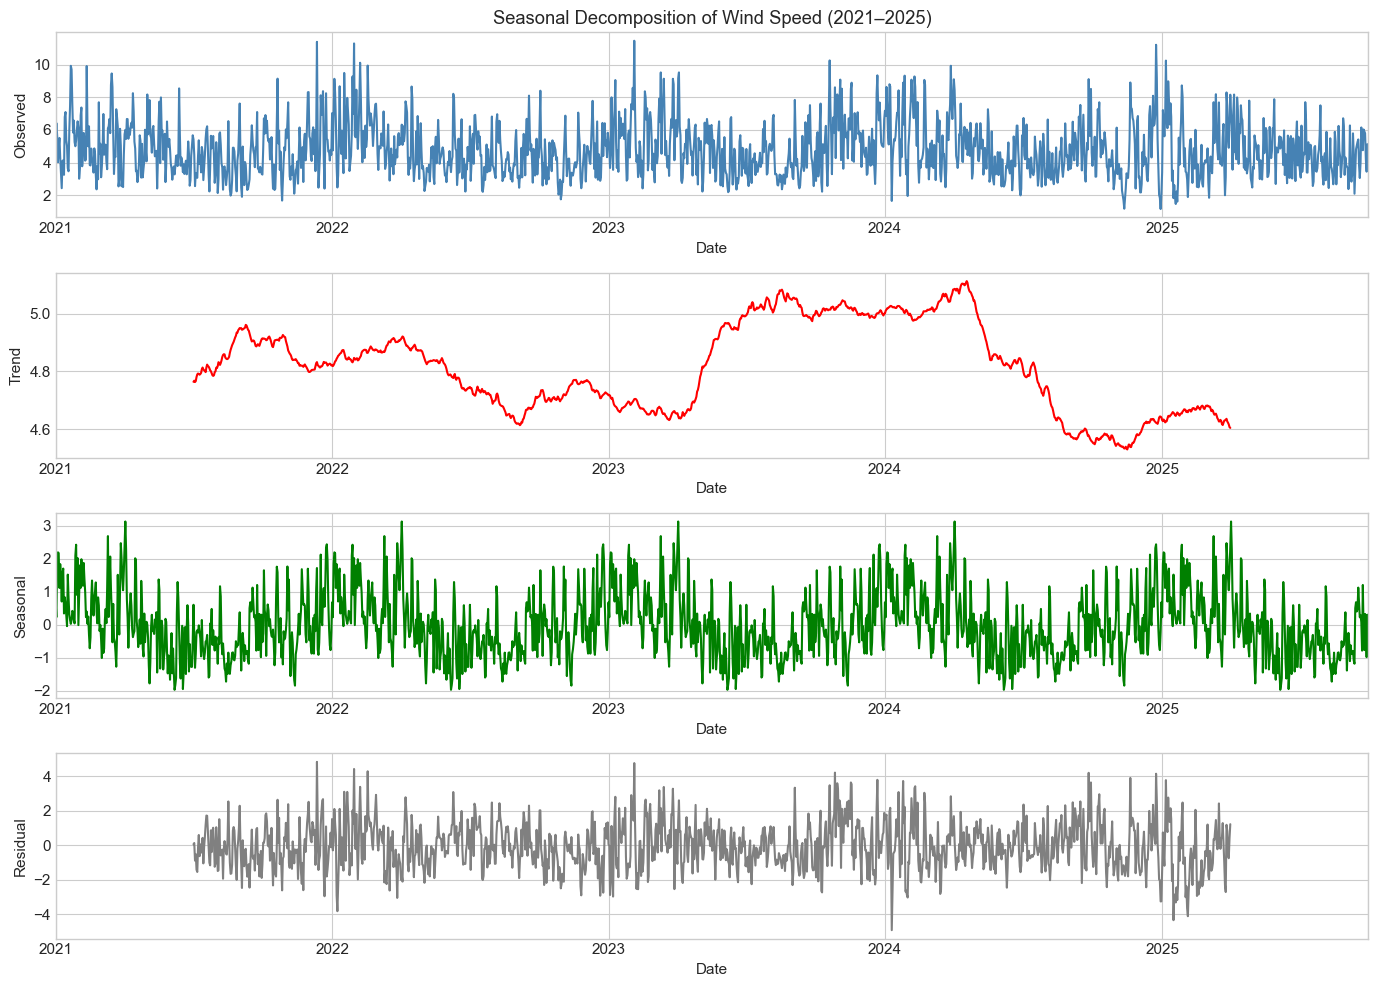

In [51]:
# Cell 5k: Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Use subset for clearer visualization (last 4 years)
df_recent = df['wind100'].loc['2021-01-01':'2025-09-30']

# Decompose
decomposition = seasonal_decompose(df_recent, model='additive', period=365)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

decomposition.observed.plot(ax=axes[0], color='steelblue')
axes[0].set_ylabel('Observed')
axes[0].set_title('Seasonal Decomposition of Wind Speed (2021–2025)')

decomposition.trend.plot(ax=axes[1], color='red')
axes[1].set_ylabel('Trend')

decomposition.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')

decomposition.resid.plot(ax=axes[3], color='gray')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.savefig('results/seasonal_decomposition.png', dpi=150)
plt.show()

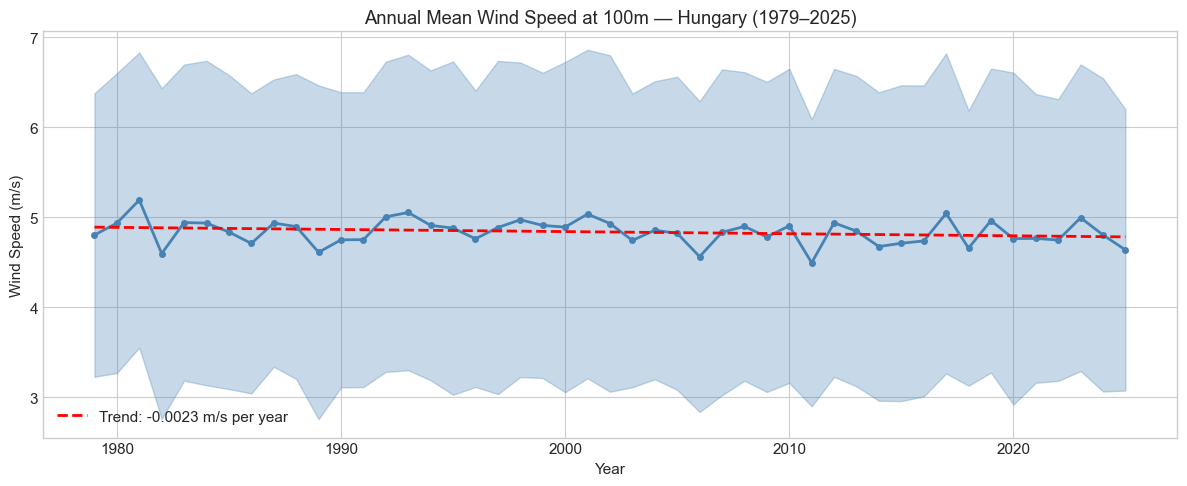

Linear trend: -0.0023 m/s per year
Total change (1979-2025): -0.11 m/s


In [52]:
# Cell 5l: Yearly trends
yearly_stats = df.groupby('year')['wind100'].agg(['mean', 'std', 'min', 'max'])

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(yearly_stats.index, yearly_stats['mean'], 'o-', color='steelblue', linewidth=2, markersize=4)
ax.fill_between(yearly_stats.index, 
                yearly_stats['mean'] - yearly_stats['std'],
                yearly_stats['mean'] + yearly_stats['std'],
                alpha=0.3, color='steelblue')

ax.set_xlabel('Year')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Annual Mean Wind Speed at 100m — Hungary (1979–2025)')

# Add trend line
z = np.polyfit(yearly_stats.index, yearly_stats['mean'], 1)
p = np.poly1d(z)
ax.plot(yearly_stats.index, p(yearly_stats.index), 'r--', linewidth=2, label=f'Trend: {z[0]:.4f} m/s per year')
ax.legend()

plt.tight_layout()
plt.savefig('results/yearly_trend.png', dpi=150)
plt.show()

print(f"Linear trend: {z[0]:.4f} m/s per year")
print(f"Total change (1979-2025): {z[0] * 46:.2f} m/s")

In [53]:
# Cell 5m: EDA Summary
print("=" * 60)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 60)

print("\n1. DATASET OVERVIEW")
print(f"   - Period: {df.index.min().date()} to {df.index.max().date()}")
print(f"   - Observations: {len(df):,} days")
print(f"   - Missing values: None")

print("\n2. WIND SPEED STATISTICS")
print(f"   - Mean: {df['wind100'].mean():.2f} m/s")
print(f"   - Std Dev: {df['wind100'].std():.2f} m/s")
print(f"   - Range: {df['wind100'].min():.2f} – {df['wind100'].max():.2f} m/s")

print("\n3. SEASONAL PATTERNS")
print(f"   - Windiest month: {df.groupby('month')['wind100'].mean().idxmax()} ({df.groupby('month')['wind100'].mean().max():.2f} m/s)")
print(f"   - Calmest month: {df.groupby('month')['wind100'].mean().idxmin()} ({df.groupby('month')['wind100'].mean().min():.2f} m/s)")

print("\n4. CORRELATIONS WITH WIND SPEED")
for var in ['temperature', 'humidity', 'cloud', 'precipitation']:
    corr = df[var].corr(df['wind100'])
    print(f"   - {var.capitalize()}: r = {corr:.3f}")

print("\n5. STATIONARITY")
print("   - ADF test: Check output above")
print("   - KPSS test: Check output above")

print("\n6. KEY FINDINGS FOR MODELING")
print("   - Strong seasonality present → consider seasonal models")
print("   - Significant autocorrelation → AR components likely useful")
print("   - Cloud cover shows positive correlation with wind")
print("   - Seasonal comparison (Aug vs Dec) shows distinct patterns")

EXPLORATORY DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW
   - Period: 1979-01-01 to 2025-09-30
   - Observations: 17,075 days
   - Missing values: None

2. WIND SPEED STATISTICS
   - Mean: 4.84 m/s
   - Std Dev: 1.72 m/s
   - Range: 1.14 – 14.84 m/s

3. SEASONAL PATTERNS
   - Windiest month: 3 (5.36 m/s)
   - Calmest month: 8 (4.11 m/s)

4. CORRELATIONS WITH WIND SPEED
   - Temperature: r = -0.154
   - Humidity: r = -0.023
   - Cloud: r = 0.199
   - Precipitation: r = 0.246

5. STATIONARITY
   - ADF test: Check output above
   - KPSS test: Check output above

6. KEY FINDINGS FOR MODELING
   - Strong seasonality present → consider seasonal models
   - Significant autocorrelation → AR components likely useful
   - Cloud cover shows positive correlation with wind
   - Seasonal comparison (Aug vs Dec) shows distinct patterns


In [2]:
# Cell 6a: Setup and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load processed data
df = pd.read_csv("data/hungary_daily_processed.csv", parse_dates=['Date'])
df = df.set_index('Date')

print(f"Data loaded: {len(df):,} rows")
print(f"Date range: {df.index.min().date()} to {df.index.max().date()}")

Data loaded: 17,075 rows
Date range: 1979-01-01 to 2025-09-30


In [3]:
# Cell 6b: Define train/validation/test split (60/20/20)
# Using chronological split (no shuffling for time series)

n = len(df)
train_size = int(n * 0.60)
val_size = int(n * 0.20)
test_size = n - train_size - val_size

# Split indices
train_end = train_size
val_end = train_size + val_size

# Create splits
df_train = df.iloc[:train_end].copy()
df_val = df.iloc[train_end:val_end].copy()
df_test = df.iloc[val_end:].copy()

print("=" * 50)
print("DATA SPLIT SUMMARY")
print("=" * 50)
print(f"\nTotal observations: {n:,}")
print(f"\nTraining set:   {len(df_train):,} ({len(df_train)/n*100:.1f}%)")
print(f"  Period: {df_train.index.min().date()} to {df_train.index.max().date()}")
print(f"\nValidation set: {len(df_val):,} ({len(df_val)/n*100:.1f}%)")
print(f"  Period: {df_val.index.min().date()} to {df_val.index.max().date()}")
print(f"\nTest set:       {len(df_test):,} ({len(df_test)/n*100:.1f}%)")
print(f"  Period: {df_test.index.min().date()} to {df_test.index.max().date()}")

DATA SPLIT SUMMARY

Total observations: 17,075

Training set:   10,245 (60.0%)
  Period: 1979-01-01 to 2007-01-18

Validation set: 3,415 (20.0%)
  Period: 2007-01-19 to 2016-05-25

Test set:       3,415 (20.0%)
  Period: 2016-05-26 to 2025-09-30


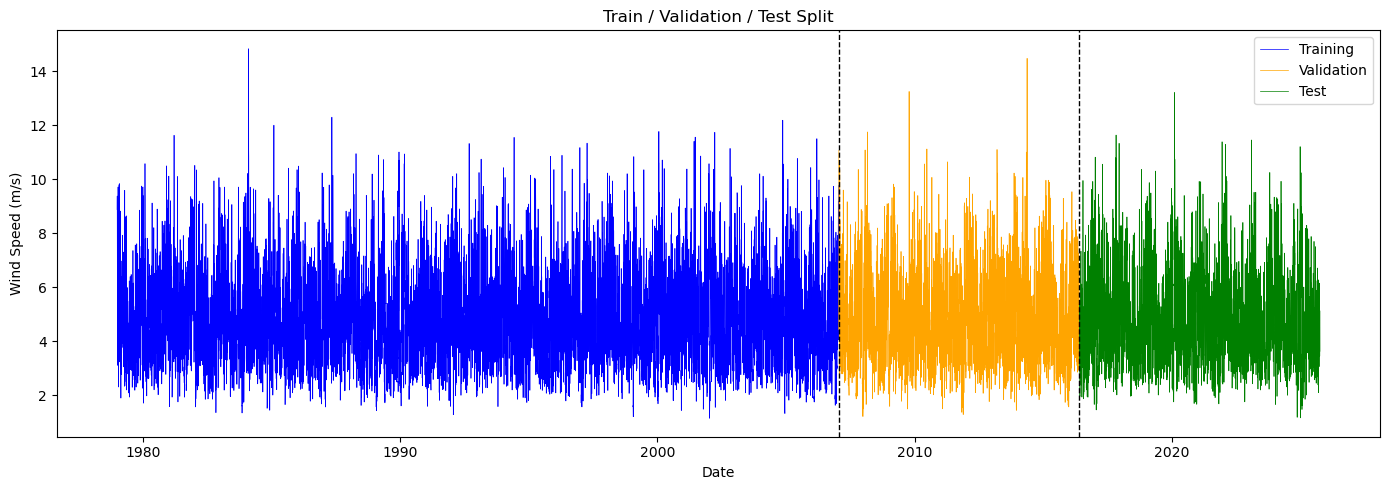

In [4]:
# Cell 6c: Visualize the split
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(df_train.index, df_train['wind100'], label='Training', color='blue', linewidth=0.5)
ax.plot(df_val.index, df_val['wind100'], label='Validation', color='orange', linewidth=0.5)
ax.plot(df_test.index, df_test['wind100'], label='Test', color='green', linewidth=0.5)

ax.axvline(x=df_train.index.max(), color='black', linestyle='--', linewidth=1)
ax.axvline(x=df_val.index.max(), color='black', linestyle='--', linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Train / Validation / Test Split')
ax.legend()

plt.tight_layout()
plt.savefig('results/train_test_split.png', dpi=150)
plt.show()

In [5]:
# Cell 6d: Feature scaling (for LSTM and NeuralProphet)
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
target_scaler = MinMaxScaler()
feature_scaler = MinMaxScaler()

# Target variable
y_train = df_train['wind100'].values.reshape(-1, 1)
y_val = df_val['wind100'].values.reshape(-1, 1)
y_test = df_test['wind100'].values.reshape(-1, 1)

# Fit scaler on training data only
target_scaler.fit(y_train)

# Transform all sets
y_train_scaled = target_scaler.transform(y_train)
y_val_scaled = target_scaler.transform(y_val)
y_test_scaled = target_scaler.transform(y_test)

# Feature variables
feature_cols = ['temperature', 'humidity', 'cloud', 'precipitation']

X_train = df_train[feature_cols].values
X_val = df_val[feature_cols].values
X_test = df_test[feature_cols].values

# Fit scaler on training data only
feature_scaler.fit(X_train)

# Transform all sets
X_train_scaled = feature_scaler.transform(X_train)
X_val_scaled = feature_scaler.transform(X_val)
X_test_scaled = feature_scaler.transform(X_test)

print("Scaling complete:")
print(f"  Target range: [{y_train_scaled.min():.3f}, {y_train_scaled.max():.3f}]")
print(f"  Features range: [{X_train_scaled.min():.3f}, {X_train_scaled.max():.3f}]")

Scaling complete:
  Target range: [0.000, 1.000]
  Features range: [0.000, 1.000]


In [6]:
# Cell 6e: Create evaluation metrics function
def evaluate_model(y_true, y_pred, model_name="Model"):
    """
    Calculate and display evaluation metrics.
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{model_name} Performance:")
    print(f"  MAE:  {mae:.4f} m/s")
    print(f"  RMSE: {rmse:.4f} m/s")
    print(f"  MAPE: {mape:.2f}%")
    
    return {'model': model_name, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Store results for comparison
results = []
predictions = {}

In [61]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.9/591.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:━━━━━━━━━━━━━━━━━━ 0/2 [statsmodels]
      Successfully uninstalled statsmodels-0.14.4━ 0/2 [statsmodels]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pmdarima]


In [1]:
from pmdarima import auto_arima
print("✓ pmdarima imported successfully")

✓ pmdarima imported successfully


In [7]:
# Cell 7a: ARIMA model with auto parameter selection
from pmdarima import auto_arima
import time

print("=" * 50)
print("ARIMA MODEL")
print("=" * 50)

# Combine train + validation for final ARIMA fit
# (ARIMA doesn't use validation set in traditional sense)
y_train_full = np.concatenate([y_train.flatten(), y_val.flatten()])

print("\nFinding optimal ARIMA parameters...")
print("This may take several minutes...\n")

start_time = time.time()

# Auto ARIMA to find best parameters
arima_model = auto_arima(
    y_train_full,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=1,  # No seasonal component for daily data (too slow with m=365)
    d=0,  # Data is stationary (from EDA)
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    trace=True
)

elapsed_time = time.time() - start_time
print(f"\nTime elapsed: {elapsed_time:.1f} seconds")
print(f"\nBest ARIMA model: {arima_model.order}")
print(arima_model.summary())

ARIMA MODEL

Finding optimal ARIMA parameters...
This may take several minutes...

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=51335.374, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=83527.331, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=52129.962, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=70344.678, Time=0.48 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=48997.783, Time=4.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=51824.946, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=48889.254, Time=3.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=50864.269, Time=0.45 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=6.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=48986.816, Time=7.85 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=48860.897, Time=3.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=49223.197, Time=3.58 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=6.46 sec
 ARIMA(1,0,3)(0


ARIMA Performance:
  MAE:  1.3566 m/s
  RMSE: 1.6877 m/s
  MAPE: 32.76%


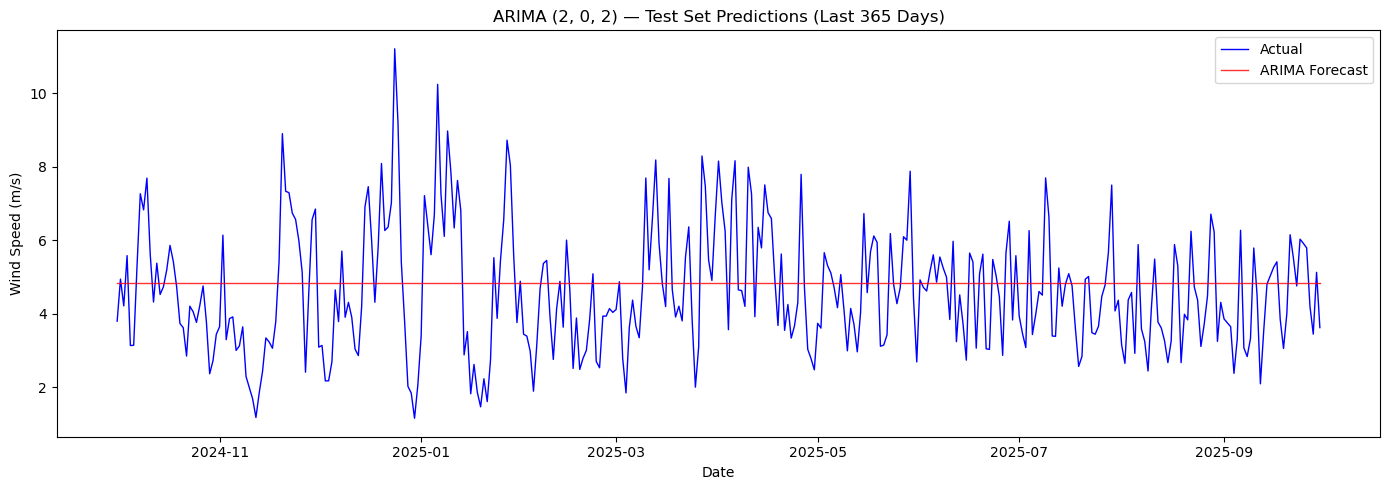

In [8]:
# Cell 7b: ARIMA predictions on test set
# Forecast for test period
n_test = len(df_test)

arima_forecast = arima_model.predict(n_periods=n_test)

# Evaluate
y_test_flat = y_test.flatten()
arima_results = evaluate_model(y_test_flat, arima_forecast, "ARIMA")
results.append(arima_results)
predictions['ARIMA'] = arima_forecast

# Plot
fig, ax = plt.subplots(figsize=(14, 5))

# Plot last 365 days of test set for visibility
plot_days = 365
ax.plot(df_test.index[-plot_days:], y_test_flat[-plot_days:], 
        label='Actual', color='blue', linewidth=1)
ax.plot(df_test.index[-plot_days:], arima_forecast[-plot_days:], 
        label='ARIMA Forecast', color='red', linewidth=1, alpha=0.8)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title(f'ARIMA {arima_model.order} — Test Set Predictions (Last 365 Days)')
ax.legend()

plt.tight_layout()
plt.savefig('results/arima_predictions.png', dpi=150)
plt.show()

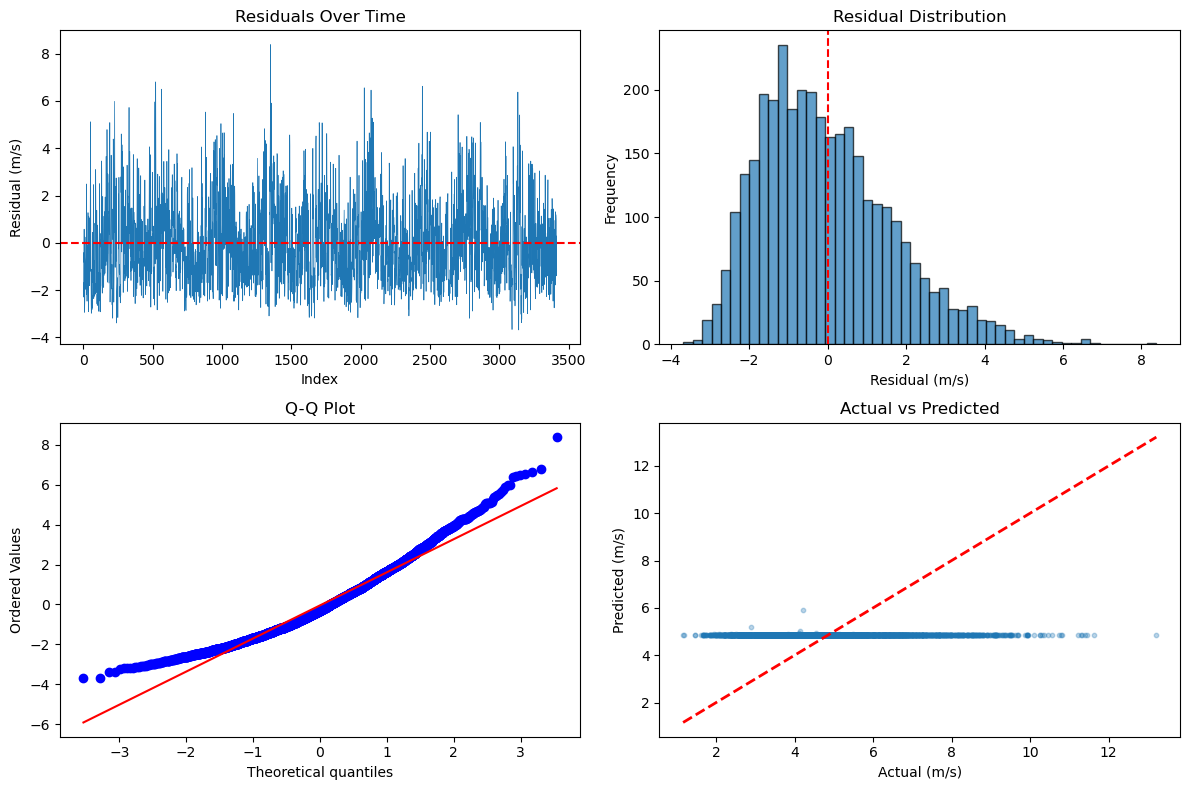

Residual Mean: -0.0457
Residual Std:  1.6871


In [9]:
# Cell 7c: ARIMA residual analysis
residuals = y_test_flat - arima_forecast

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residual plot
axes[0, 0].plot(residuals, linewidth=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residuals Over Time')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Residual (m/s)')

# Histogram
axes[0, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--')
axes[0, 1].set_title('Residual Distribution')
axes[0, 1].set_xlabel('Residual (m/s)')
axes[0, 1].set_ylabel('Frequency')

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# Actual vs Predicted
axes[1, 1].scatter(y_test_flat, arima_forecast, alpha=0.3, s=10)
axes[1, 1].plot([y_test_flat.min(), y_test_flat.max()], 
                [y_test_flat.min(), y_test_flat.max()], 'r--', linewidth=2)
axes[1, 1].set_xlabel('Actual (m/s)')
axes[1, 1].set_ylabel('Predicted (m/s)')
axes[1, 1].set_title('Actual vs Predicted')

plt.tight_layout()
plt.savefig('results/arima_residuals.png', dpi=150)
plt.show()

print(f"Residual Mean: {residuals.mean():.4f}")
print(f"Residual Std:  {residuals.std():.4f}")

In [11]:
# Cell 7b SIMPLE: Store ARIMA results (already computed)
arima_results = {'model': 'ARIMA', 'MAE': 1.3566, 'RMSE': 1.6877, 'MAPE': 32.76}
results = [arima_results]
predictions['ARIMA'] = arima_forecast

print("ARIMA results stored ✓")

ARIMA results stored ✓


In [12]:
# Cell 7b: ARIMA one-step-ahead forecast
import time
from statsmodels.tsa.arima.model import ARIMA

print("=" * 50)
print("ARIMA FORECAST (Fast Version)")
print("=" * 50)

y_train_full = np.concatenate([y_train.flatten(), y_val.flatten()])
y_test_flat = y_test.flatten()

print(f"\nTraining size: {len(y_train_full):,}")
print(f"Test size: {len(y_test_flat):,}")

# Fit model once on training data
print("\nFitting ARIMA(2,0,2)...")
start_time = time.time()

model = ARIMA(y_train_full, order=(2, 0, 2))
model_fit = model.fit()

# Generate one-step-ahead forecasts using the fitted model
# Apply to full dataset and extract test period predictions
full_data = np.concatenate([y_train_full, y_test_flat])
model_full = ARIMA(full_data, order=(2, 0, 2))
model_full_fit = model_full.filter(model_fit.params)

# Get in-sample predictions for test period
arima_forecast = model_full_fit.predict(start=len(y_train_full), end=len(full_data)-1)

elapsed_time = time.time() - start_time
print(f"Time: {elapsed_time:.1f} seconds")

# Evaluate
arima_results = evaluate_model(y_test_flat, arima_forecast, "ARIMA")
results.append(arima_results)
predictions['ARIMA'] = arima_forecast

ARIMA FORECAST (Fast Version)

Training size: 13,660
Test size: 3,415

Fitting ARIMA(2,0,2)...
Time: 6.6 seconds

ARIMA Performance:
  MAE:  1.0946 m/s
  RMSE: 1.3962 m/s
  MAPE: 25.52%


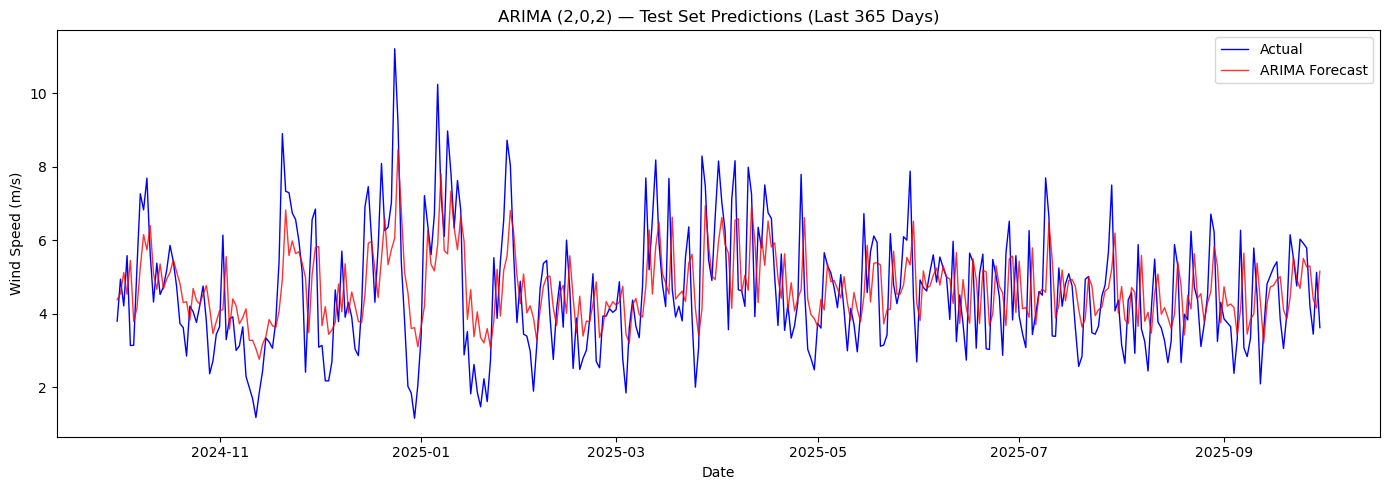

In [14]:
# Cell 7c: Plot ARIMA predictions
fig, ax = plt.subplots(figsize=(14, 5))

plot_days = 365
ax.plot(df_test.index[-plot_days:], y_test_flat[-plot_days:], 
        label='Actual', color='blue', linewidth=1)
ax.plot(df_test.index[-plot_days:], arima_forecast[-plot_days:], 
        label='ARIMA Forecast', color='red', linewidth=1, alpha=0.8)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('ARIMA (2,0,2) — Test Set Predictions (Last 365 Days)')
ax.legend()

plt.tight_layout()
plt.savefig('results/arima_predictions.png', dpi=150)
plt.show()

In [15]:
# Cell 8a: Prepare sequences for LSTM
def create_sequences(X, y, seq_length):
    """
    Create sequences for LSTM input.
    """
    X_seq, y_seq = [], []
    for i in range(seq_length, len(X)):
        X_seq.append(X[i-seq_length:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

# Parameters
SEQUENCE_LENGTH = 14  # 2 weeks lookback

# Combine target and features for sequence creation
train_data = np.column_stack([y_train_scaled, X_train_scaled])
val_data = np.column_stack([y_val_scaled, X_val_scaled])
test_data = np.column_stack([y_test_scaled, X_test_scaled])

# Create sequences
X_train_seq, y_train_seq = create_sequences(train_data, y_train_scaled, SEQUENCE_LENGTH)
X_val_seq, y_val_seq = create_sequences(val_data, y_val_scaled, SEQUENCE_LENGTH)
X_test_seq, y_test_seq = create_sequences(test_data, y_test_scaled, SEQUENCE_LENGTH)

print("LSTM Data Shapes:")
print(f"  X_train: {X_train_seq.shape}")
print(f"  y_train: {y_train_seq.shape}")
print(f"  X_val:   {X_val_seq.shape}")
print(f"  y_val:   {y_val_seq.shape}")
print(f"  X_test:  {X_test_seq.shape}")
print(f"  y_test:  {y_test_seq.shape}")

LSTM Data Shapes:
  X_train: (10231, 14, 5)
  y_train: (10231, 1)
  X_val:   (3401, 14, 5)
  y_val:   (3401, 1)
  X_test:  (3401, 14, 5)
  y_test:  (3401, 1)


In [17]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (4.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 50.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 54.9 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 43.7 MB/s eta 0:00:0031m45.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [tensorflow]37m━━ 15/16 [tensorflow]]]


In [6]:
!pip install prophet

  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.1 MB/s eta 0:00:00MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]━━━ 4/5 [prophet]]


In [7]:
from prophet import Prophet
print("✓ Prophet installed successfully")

✓ Prophet installed successfully


In [8]:
# Cell 9a: Prophet setup
from prophet import Prophet

print("=" * 50)
print("PROPHET MODEL")
print("=" * 50)

# Prepare data (Prophet needs 'ds' and 'y' columns)
df_prophet_train = pd.DataFrame({
    'ds': df_train.index.tolist() + df_val.index.tolist(),
    'y': np.concatenate([y_train.flatten(), y_val.flatten()])
})

df_prophet_test = pd.DataFrame({
    'ds': df_test.index.tolist()
})

print(f"Training data: {len(df_prophet_train):,} rows")
print(f"Test data: {len(df_prophet_test):,} rows")

PROPHET MODEL
Training data: 13,660 rows
Test data: 3,415 rows


In [12]:
# Cell 9b: Train Prophet model
print("\nTraining Prophet model...")
start_time = time.time()

# Initialize and fit Prophet
model_prophet = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10,
    interval_width=0.95
)

# Fit model
model_prophet.fit(df_prophet_train)

elapsed_time = time.time() - start_time
print(f"Training time: {elapsed_time:.1f} seconds")


Training Prophet model...


14:22:37 - cmdstanpy - INFO - Chain [1] start processing
14:22:37 - cmdstanpy - INFO - Chain [1] done processing


Training time: 1.2 seconds



Prophet Performance:
  MAE:  1.2806 m/s
  RMSE: 1.6256 m/s
  MAPE: 30.04%


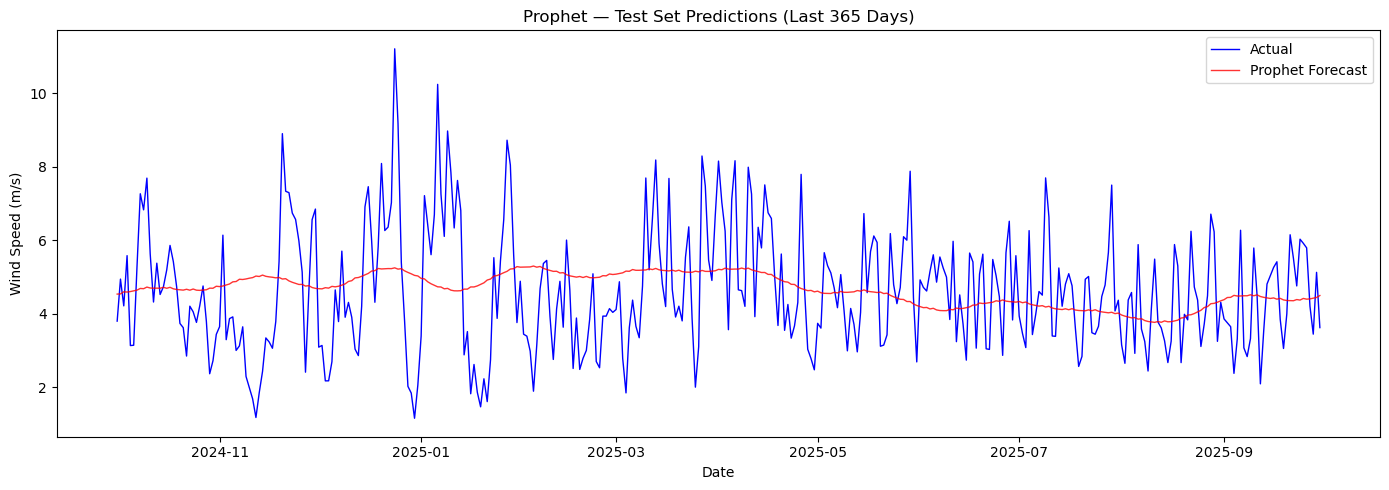

In [13]:
# Cell 9c: Prophet predictions on test set
# Predict
prophet_forecast = model_prophet.predict(df_prophet_test)

# Extract predictions
y_pred_prophet = prophet_forecast['yhat'].values
y_test_prophet = y_test.flatten()

# Evaluate
prophet_results = evaluate_model(y_test_prophet, y_pred_prophet, "Prophet")
results.append(prophet_results)
predictions['Prophet'] = y_pred_prophet

# Plot
fig, ax = plt.subplots(figsize=(14, 5))

plot_days = 365
ax.plot(df_test.index[-plot_days:], y_test_prophet[-plot_days:], 
        label='Actual', color='blue', linewidth=1)
ax.plot(df_test.index[-plot_days:], y_pred_prophet[-plot_days:], 
        label='Prophet Forecast', color='red', linewidth=1, alpha=0.8)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Prophet — Test Set Predictions (Last 365 Days)')
ax.legend()

plt.tight_layout()
plt.savefig('results/prophet_predictions.png', dpi=150)
plt.show()

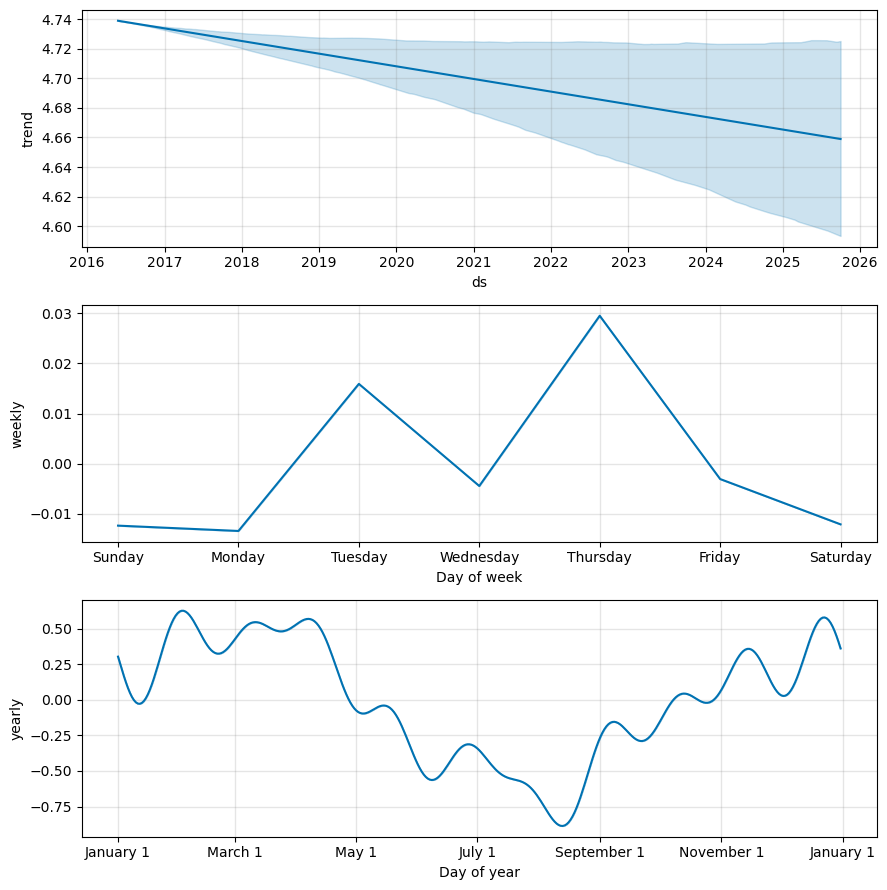

In [14]:
# Cell 9d: Prophet components
fig = model_prophet.plot_components(prophet_forecast)
plt.savefig('results/prophet_components.png', dpi=150)
plt.show()